In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

<h1> manual foreground extraction </h1>

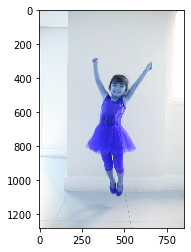

In [30]:
#img = cv2.imread('data/opencv-python-foreground-extraction-tutorial.jpg')
img = cv2.imread('data/menina.jpeg')
plt.imshow(img)

In [31]:
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

#rect = (161,79,150,150) #rectangle with the foreground image #change the image change the rectangle
rect = (200,300,550,1100)

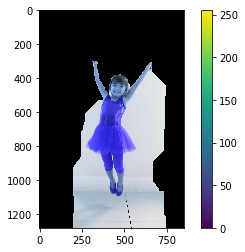

In [32]:
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

<h1>corner detection</h1>

read https://en.wikipedia.org/wiki/Corner_detection

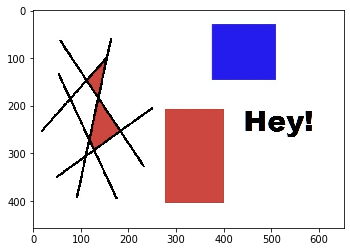

In [43]:
img = cv2.imread('data/opencv-corner-detection-sample.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
grayf = np.float32(gray)

plt.imshow(img)

In [44]:
corners = cv2.goodFeaturesToTrack(grayf, 100, 0.01, 10)
corners = np.int0(corners)



In [45]:
for corner in corners:
    x,y = corner.ravel()
    cv2.circle(img,(x,y),3,255,-1)

    
cv2.imshow('Corner',img)
#pq não funciona com o plt?

In [46]:
#release para a imgem da opencv - obrigatório
cv2.waitKey(0)
cv2.destroyAllWindows()

Hough lines

In [2]:
img = cv2.imread('data/opencv-corner-detection-sample.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray,50,120,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/190,200)
#print lines
#print len(lines[0])
for i in range(len(lines)):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
        cv2.imshow('houghlines.jpg',img)
        cv2.waitKey(1)

cv2.imshow('houghlines.jpg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

27